In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [161]:
data=pd.read_csv("/content/drive/MyDrive/machine learnig/MedicalInsuranceCostPrice/insurance.csv")

In [162]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [164]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [165]:
#checking for the missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [166]:
Categorical_feature=[feature for feature in data.columns if data[feature].dtype=="O"]
Categorical_feature

['sex', 'smoker', 'region']

In [167]:
numerical_feature=[feature for feature in data.columns if data[feature].dtype!="O"]
numerical_feature

['age', 'bmi', 'children', 'charges']

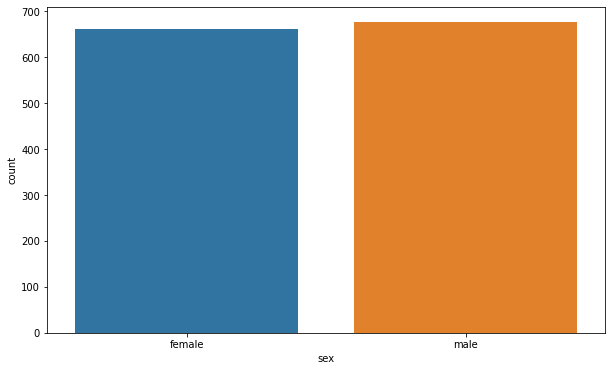

In [168]:
plt.figure(figsize=(10,6))
sns.countplot(data['sex'])
plt.show()

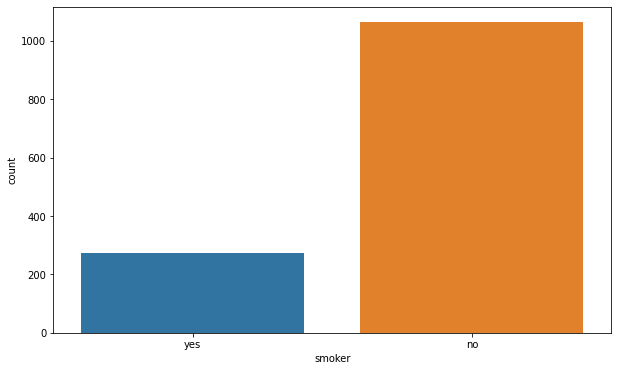

In [169]:
plt.figure(figsize=(10,6))
sns.countplot(data['smoker'])
plt.show()

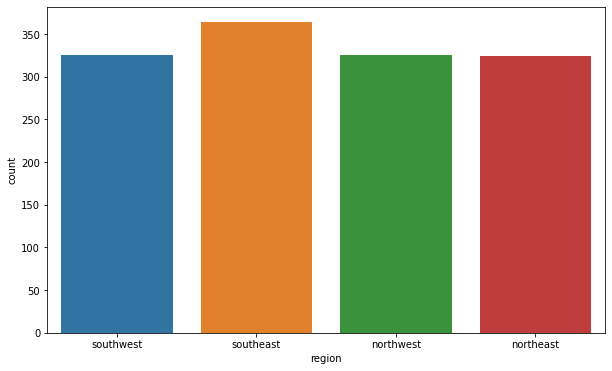

In [170]:
plt.figure(figsize=(10,6))
sns.countplot(data['region'])
plt.show()

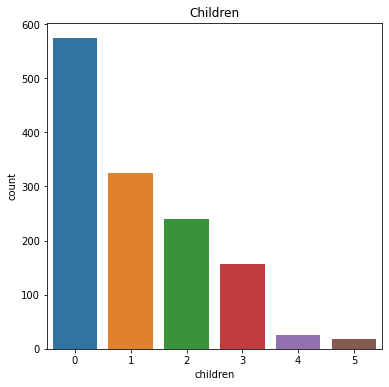

In [171]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children')
plt.show()

In [172]:
numerical_feature

['age', 'bmi', 'children', 'charges']

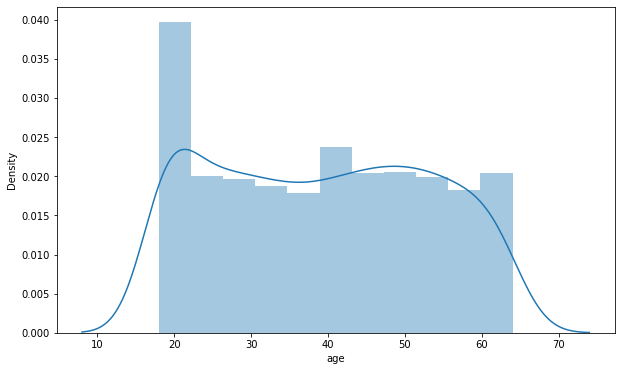

In [173]:
plt.figure(figsize=(10,6))
sns.distplot(data['age'])
plt.show()

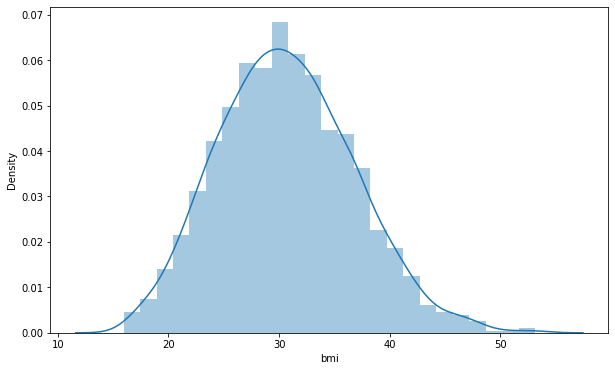

In [174]:
plt.figure(figsize=(10,6))
sns.distplot(data['bmi'])
plt.show()

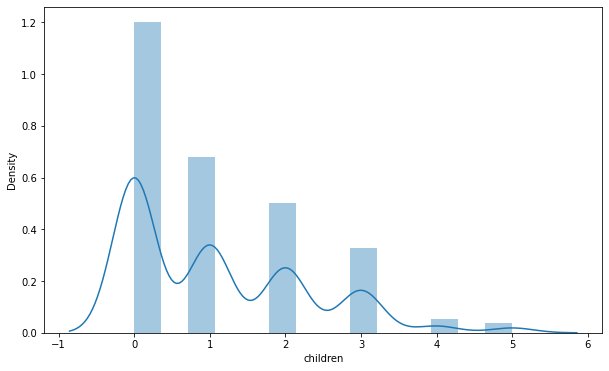

In [175]:
plt.figure(figsize=(10,6))
sns.distplot(data['children'])
plt.show()

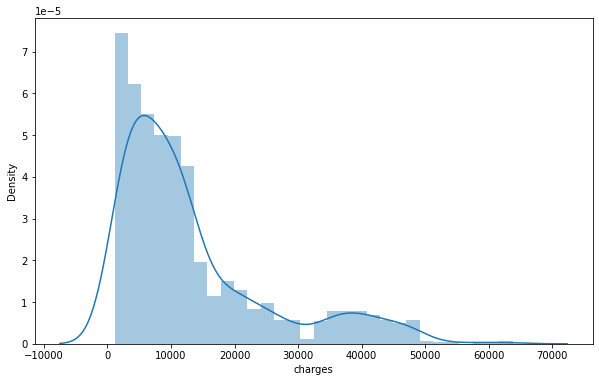

In [176]:
plt.figure(figsize=(10,6))
sns.distplot(data['charges'])
plt.show()

In [177]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

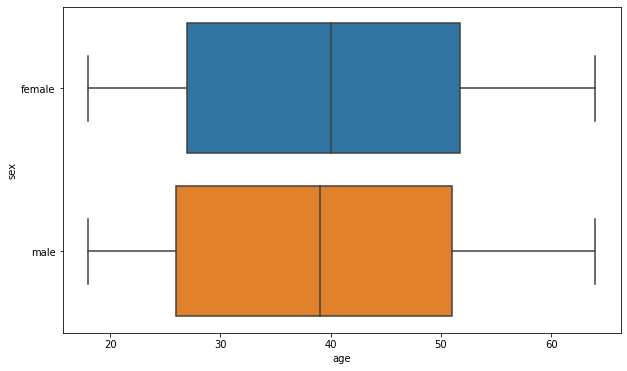

In [178]:
plt.figure(figsize=(10,6))
sns.boxplot(x='age',y='sex',data=data)
plt.show()

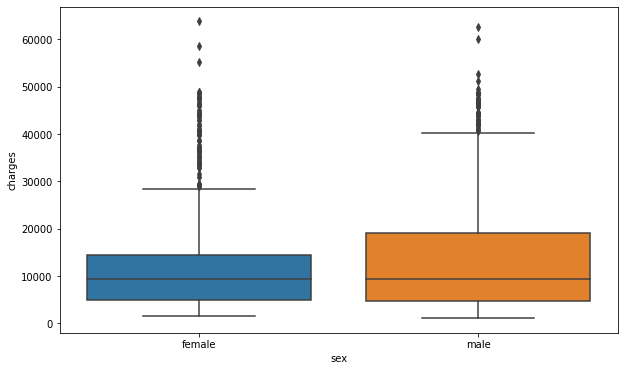

In [179]:
plt.figure(figsize=(10,6))
sns.boxplot(x='sex',y='charges',data=data)
plt.show()

In [180]:
data.groupby(['children']).mean()

,age,bmi,charges
children,,,
0,38.444251,30.550296,12365.975602
1,39.453704,30.623148,12731.171832
2,39.445833,30.978104,15073.563734
3,41.566879,30.684331,15355.318367
4,39.000000,31.391200,13850.656311
5,35.611111,29.605000,8786.035247


In [181]:
data.groupby(['smoker'])['charges'].median()

smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64

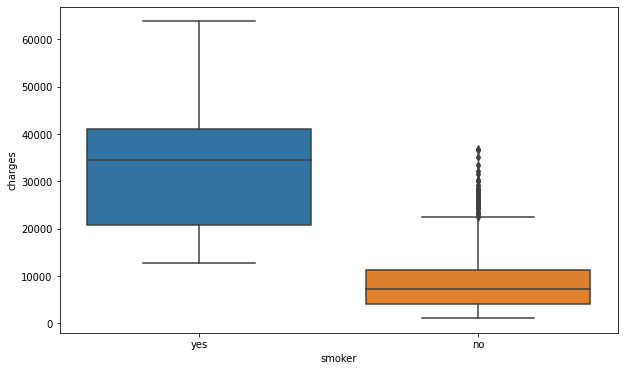

In [182]:
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker',y='charges',data=data)
plt.show()

In [183]:
data.groupby(['region'])['charges'].median()

region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

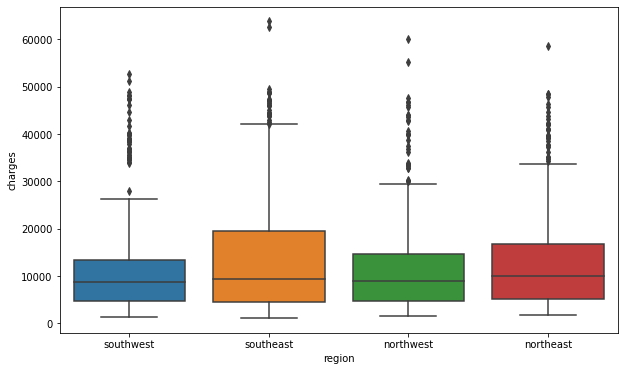

In [184]:
plt.figure(figsize=(10,6))
sns.boxplot(x='region',y='charges',data=data)
plt.show()

In [185]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [186]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [187]:
#encoding the categorical feature
#encoding the sex column
data.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [188]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [189]:
#splitting the data
X=data.drop('charges',axis=1)
y=data['charges']

In [190]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [191]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Train and test split

In [192]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [193]:
X_train

,age,sex,bmi,children,smoker,region
560,46,1,19.950,2,1,3
1285,47,1,24.320,0,1,2
1142,52,1,24.860,0,1,0
969,39,1,34.320,5,1,0
486,54,1,21.470,3,1,3
...,...,...,...,...,...,...
1095,18,1,31.350,4,1,2
1130,39,1,23.870,5,1,0
1294,58,0,25.175,0,1,2
860,37,1,47.600,2,0,1


In [194]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# model buliding

In [195]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [196]:
y_pred =model.predict(X_test)

In [197]:
y_pred

array([ 8597.28489536,  7231.74388195, 37039.23208958,  9616.21212862,
       27161.15504663, 11108.40935815,   354.21613174, 17042.35421504,
         747.16617118, 11372.94571472, 28400.38875084,  9533.99600035,
        5216.48749305, 38355.5614174 , 40201.25019476, 37046.88317993,
       15158.02888612, 35867.31947109,  9063.07424995, 31650.09572393,
        4122.46955807, 10389.18037453,  2647.70215941,  6752.0935722 ,
       11455.70143538, 12576.55372408, 14761.43409329,  6317.33228079,
        9588.04741124,  2138.14714947,  9375.87714427, 13225.72806329,
        4510.16138921,  3585.45839256,  4732.66994672, 12637.34626748,
        2260.33231947,  9078.92932601, 33459.16411947, 32548.1168527 ,
        4174.80105455,  4490.15618578, 14392.1262442 , 11588.95999023,
        8712.67197642, 12363.57345011,  5437.31098673,  3428.38801627,
       35447.7739549 ,  9084.07365487, 15767.62103266,  2302.7507234 ,
       12500.96481021,  1124.34689348, 13327.47845234, 12187.16682473,
      

In [198]:
# R squared value
from sklearn.metrics import r2_score
r2_train =r2_score(y_test, y_pred)
print('R squared vale : ', r2_train)

R squared vale :  0.783021587162344


In [201]:
input_data = (31,1,25.74,0,1,0)
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data=sc.transform(input_data_as_numpy_array.reshape(1,-1))

prediction = model.predict(input_data)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[4016.99266999]
The insurance cost is USD  4016.9926699873213


In [205]:
# save the model to disk
import pickle
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))